## NOMOR 1
### [LO1, LO2, 30 poin] Buka file data “insurance-cost.csv” yang diberikan pada link berikut ini: 
### https://bit.ly/3ugXXf2. Dataset tersebut berisi profil para pemegang asuransi beserta nominal premi asuransinya. Anda diminta membangun model untuk memprediksi nominal biaya premi asuransi tersebut. Lakukan Data Cleaning dan Visual Exploratory Data Analysis, dengan detail yang dimaksud sebagai berikut:

### a) Membaca Dataset dan Gunakan variable-variabel yang ditentukan berikut ini:
####• age,
####• sex,
####• bmi,
####• children,
####• smoker,
####• region,
####• charges (nominal premi asuransi).

In [ ]:
import pandas as pd

Data = pd.read_csv("insurance-cost.csv", usecols = ['age','sex','bmi','children',
                                                           'smoker','region','charges'])

### Memperlihatkan Isi Dataset

In [ ]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### b) Periksa missing values dan jika terdapat missing value, maka isilah missing values tersebut dengan ketentuan sebagai berikut:
####• Variabel yang bersifat continuous diisi dengan nilai rata-rata dari variabel.
####• Variabel yang bersifat categorical diisi dengan nilai modus dari variabel.
####• Pengisian missing values juga mempertimbangkan jenis kelamin. Artinya, jika nilai variabel yang kosong adalah milik pemegang asuransi berjenis kelamin pria, maka nilai modus atau mean hanya dihitung terhadap samples berjenis kelamin pria.

In [ ]:
Data.isnull().sum()

age         0
sex         0
bmi         2
children    0
smoker      2
region      0
charges     0
dtype: int64

### kolom 'bmi' bersifat continous, maka missing valuenya akan diisi dengan nilai rata rata.

In [ ]:
RataRataBMIWanitaDanPria = Data.groupby('sex').bmi.mean()
print(RataRataBMIWanitaDanPria)

sex
female    30.372829
male      30.936230
Name: bmi, dtype: float64


In [ ]:
RataRataBMIArray = []
RataRataBMIArray = RataRataBMIWanitaDanPria.values

RataRataBMIWanita = RataRataBMIArray[0]
RataRataBMIPria   = RataRataBMIArray[1]

In [ ]:
# Cari di Index Mana Kolom BMI terdapat Missing Value
Data[Data['bmi'].isnull()].index.tolist()

[30, 51]

In [ ]:
# Cek apakah Index ke 30 Wanita atau Pria
print(Data['sex'][30])

male


In [ ]:
# Masukkan sesuai valuenya (Index 30 Male, maka masukkan value rata rata BMI Pria)
Data['bmi'][30] = RataRataBMIPria

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Cek apakah Index ke 51 Wanita atau Pria
print(Data['sex'][51])

female


In [ ]:
# Masukkan sesuai valuenya (Index 51 Female, maka masukkan value rata rata BMI Perempuan)
Data['bmi'][51] = RataRataBMIWanita

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Cek apakah kolom 'bmi' masih terdapat Missing Value kembali
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      2
region      0
charges     0
dtype: int64

### kolom 'smoker' bersifat categorical, maka missing value akan diisi dengan nilai modus.

In [ ]:
# Cari di Index Mana Kolom Smoker terdapat Missing Value
Data[Data['smoker'].isnull()].index.tolist()

[32, 53]

In [ ]:
femaleSmokerYes = 0
femaleSmokerNo  = 0
maleSmokerYes   = 0
maleSmokerNo    = 0

In [ ]:
jumlahData = len(Data)
print(jumlahData)

for i in range(jumlahData):
  if i == 32 or i == 53:
    continue
  if Data['sex'][i] == 'female':
    if Data['smoker'][i] == 'yes':
      femaleSmokerYes = femaleSmokerYes + 1
    elif Data['smoker'][i] == 'no':
      femaleSmokerNo = femaleSmokerNo + 1
  elif Data['sex'][i] == 'male':
    if Data['smoker'][i] == 'yes':
      maleSmokerYes = maleSmokerYes + 1
    elif Data['smoker'][i] == 'no':
      maleSmokerNo = maleSmokerNo + 1

1338


In [ ]:
totalFemaleSmoker = femaleSmokerYes
totalFemaleNonSmoker = femaleSmokerNo

totalMaleSmoker   = maleSmokerYes
totalMaleNonSmoker = maleSmokerNo

In [ ]:
print("Jumlah Smoker Wanita = ", totalFemaleSmoker)
print("Jumlah Non-Smoker Wanita = ", totalFemaleNonSmoker)

print("Jumlah Smoker Pria = ", totalMaleSmoker)
print("Jumlah Non-Smoker Pria = ", totalMaleNonSmoker)

Jumlah Smoker Wanita =  115
Jumlah Non-Smoker Wanita =  546
Jumlah Smoker Pria =  158
Jumlah Non-Smoker Pria =  517


In [ ]:
# Cek apakah Index ke 32 Wanita atau Pria
print(Data['sex'][32])

female


In [ ]:
# Masukkan sesuai valuenya (Index 32 Female, maka masukkan value modus smoker wanita)
Data['smoker'][32] = 'no'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Cek apakah Index ke 53 Wanita atau Pria
print(Data['sex'][53])

male


In [ ]:
# Masukkan sesuai valuenya (Index 53 Male, maka masukkan value modus smoker pria)
Data['smoker'][53] = 'no'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Cek apakah kolom 'smoker' masih terdapat Missing Value kembali
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### c) Buat visualisasi terhadap setiap independent variable dan jelaskan hubungan antar setiap independent variables. 

#### Ubah Data Kategorikal 'sex', 'smoker', dan 'region' menjadi numeric

In [ ]:
import numpy

# Kolom 'sex'
cat_arr = numpy.array(pd.Categorical(Data['sex']).categories)
print(cat_arr)

['female' 'male']


In [ ]:
Data["sex"] = Data["sex"].astype('category')
Data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker        object
region        object
charges      float64
dtype: object

In [ ]:
Data["sex"] = Data["sex"].cat.codes
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
# Kolom 'smoker'
cat_arr = numpy.array(pd.Categorical(Data['smoker']).categories)
print(cat_arr)

['no' 'yes']


In [ ]:
Data["smoker"] = Data["smoker"].astype('category')
Data.dtypes

age            int64
sex             int8
bmi          float64
children       int64
smoker      category
region        object
charges      float64
dtype: object

In [ ]:
Data["smoker"] = Data["smoker"].cat.codes
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
# Kolom 'region'
cat_arr = numpy.array(pd.Categorical(Data['region']).categories)
print(cat_arr)

['northeast' 'northwest' 'southeast' 'southwest']


In [ ]:
Data["region"] = Data["region"].astype('category')
Data.dtypes

age            int64
sex             int8
bmi          float64
children       int64
smoker          int8
region      category
charges      float64
dtype: object

In [ ]:
Data["region"] = Data["region"].cat.codes
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Lakukan Normalisasi Data Sehingga tidak terjadi Jangkauan Nilai Antar Kolom Data yang sangat Besar (Kolom 'age', 'bmi', dan 'charges')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data
df_scaled = scaler.fit_transform(Data.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['age','sex','bmi','children',
                                                           'smoker','region','charges'])
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


#### Di soal dikatakan bahwa "Anda diminta membangun model untuk memprediksi nominal biaya premi asuransi tersebut". Maka 'charges' merupakan dependent variables.

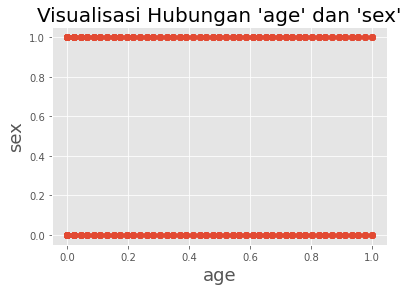

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.scatter(df_scaled['age'], df_scaled['sex'])
plt.title('Visualisasi Hubungan \'age\' dan \'sex\'', size=20)
plt.xlabel('age', size=18)
plt.ylabel('sex', size=18);
plt.show()

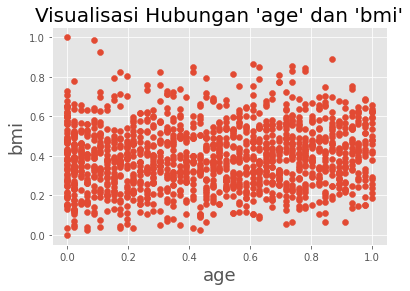

In [ ]:
plt.scatter(df_scaled['age'], df_scaled['bmi'])
plt.title('Visualisasi Hubungan \'age\' dan \'bmi\'', size=20)
plt.xlabel('age', size=18)
plt.ylabel('bmi', size=18);
plt.show()

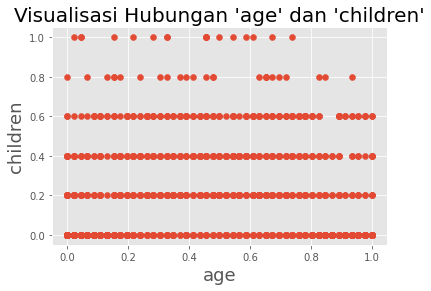

In [ ]:
plt.scatter(df_scaled['age'], df_scaled['children'])
plt.title('Visualisasi Hubungan \'age\' dan \'children\'', size=20)
plt.xlabel('age', size=18)
plt.ylabel('children', size=18);
plt.show()

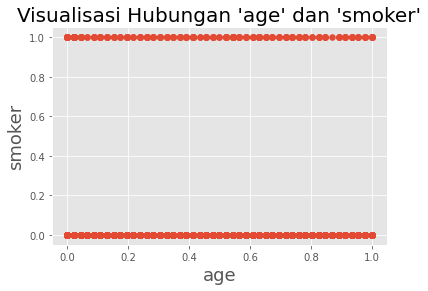

In [ ]:
plt.scatter(df_scaled['age'], df_scaled['smoker'])
plt.title('Visualisasi Hubungan \'age\' dan \'smoker\'', size=20)
plt.xlabel('age', size=18)
plt.ylabel('smoker', size=18);
plt.show()

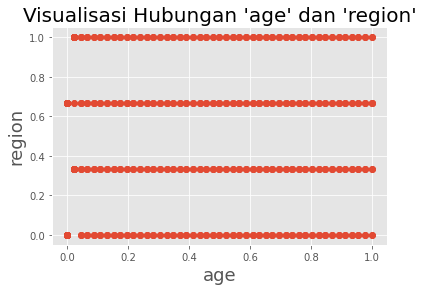

In [ ]:
plt.scatter(df_scaled['age'], df_scaled['region'])
plt.title('Visualisasi Hubungan \'age\' dan \'region\'', size=20)
plt.xlabel('age', size=18)
plt.ylabel('region', size=18);
plt.show()

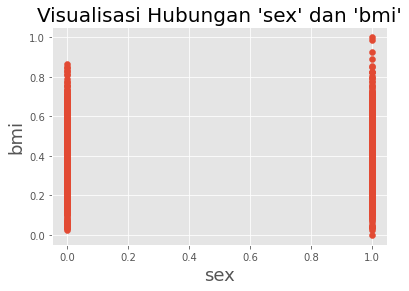

In [ ]:
plt.scatter(df_scaled['sex'], df_scaled['bmi'])
plt.title('Visualisasi Hubungan \'sex\' dan \'bmi\'', size=20)
plt.xlabel('sex', size=18)
plt.ylabel('bmi', size=18);
plt.show()

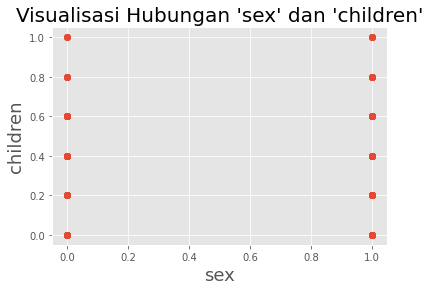

In [ ]:
plt.scatter(df_scaled['sex'], df_scaled['children'])
plt.title('Visualisasi Hubungan \'sex\' dan \'children\'', size=20)
plt.xlabel('sex', size=18)
plt.ylabel('children', size=18);
plt.show()

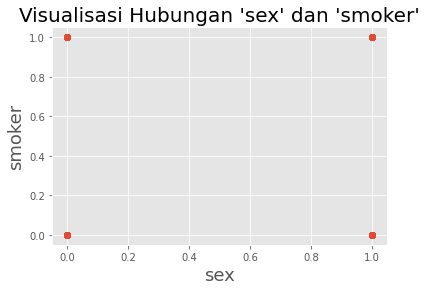

In [ ]:
plt.scatter(df_scaled['sex'], df_scaled['smoker'])
plt.title('Visualisasi Hubungan \'sex\' dan \'smoker\'', size=20)
plt.xlabel('sex', size=18)
plt.ylabel('smoker', size=18);
plt.show()

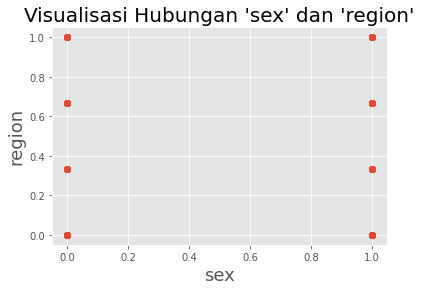

In [ ]:
plt.scatter(df_scaled['sex'], df_scaled['region'])
plt.title('Visualisasi Hubungan \'sex\' dan \'region\'', size=20)
plt.xlabel('sex', size=18)
plt.ylabel('region', size=18);
plt.show()

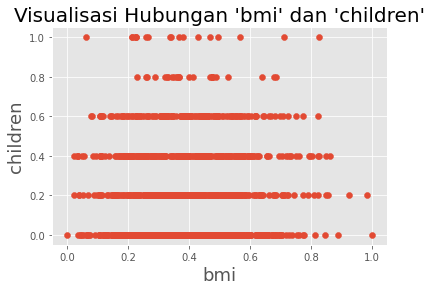

In [ ]:
plt.scatter(df_scaled['bmi'], df_scaled['children'])
plt.title('Visualisasi Hubungan \'bmi\' dan \'children\'', size=20)
plt.xlabel('bmi', size=18)
plt.ylabel('children', size=18);
plt.show()

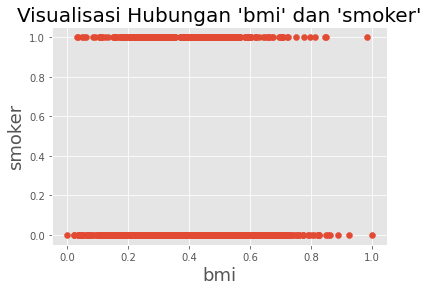

In [ ]:
plt.scatter(df_scaled['bmi'], df_scaled['smoker'])
plt.title('Visualisasi Hubungan \'bmi\' dan \'smoker\'', size=20)
plt.xlabel('bmi', size=18)
plt.ylabel('smoker', size=18);
plt.show()

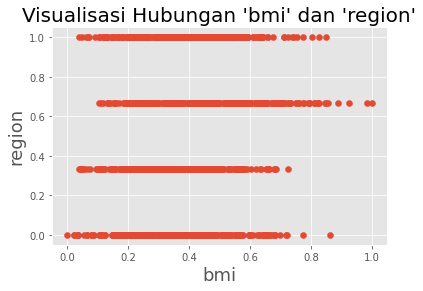

In [ ]:
plt.scatter(df_scaled['bmi'], df_scaled['region'])
plt.title('Visualisasi Hubungan \'bmi\' dan \'region\'', size=20)
plt.xlabel('bmi', size=18)
plt.ylabel('region', size=18);
plt.show()

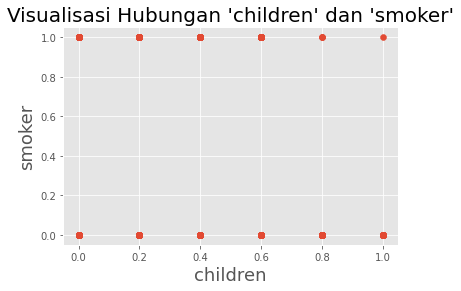

In [ ]:
plt.scatter(df_scaled['children'], df_scaled['smoker'])
plt.title('Visualisasi Hubungan \'children\' dan \'smoker\'', size=20)
plt.xlabel('children', size=18)
plt.ylabel('smoker', size=18);
plt.show()

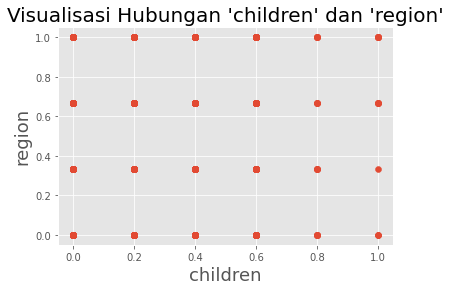

In [ ]:
plt.scatter(df_scaled['children'], df_scaled['region'])
plt.title('Visualisasi Hubungan \'children\' dan \'region\'', size=20)
plt.xlabel('children', size=18)
plt.ylabel('region', size=18);
plt.show()

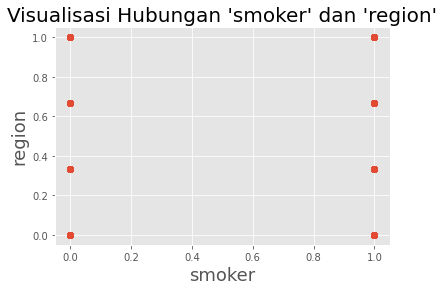

In [ ]:
plt.scatter(df_scaled['smoker'], df_scaled['region'])
plt.title('Visualisasi Hubungan \'smoker\' dan \'region\'', size=20)
plt.xlabel('smoker', size=18)
plt.ylabel('region', size=18);
plt.show()

### d) Buat grafik correlation antara setiap independent variable dengan dependent variable. Lalu jelaskan masing-masing correlation tersebut!

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


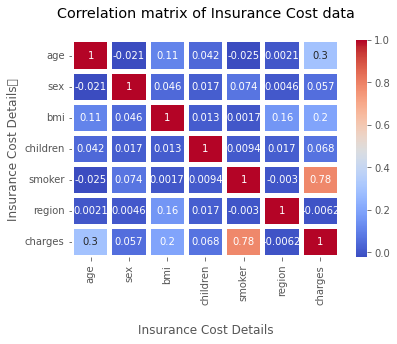

In [ ]:
import seaborn as sns

hm = sns.heatmap(df_scaled.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=4)
hm.set(xlabel='\nInsurance Cost Details', ylabel='Insurance Cost Details\t', title = "Correlation matrix of Insurance Cost data\n")
plt.show()

## NOMOR 2
### [LO1, LO2, 10 poin] Buatlah Training Set dan Test Set dengan proporsi 4:1, lalu tampilkan Training Set.

In [ ]:
X = df_scaled[['age','sex','bmi','children','smoker','region']].values
y = df_scaled['charges'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [ ]:
print(X_train)

[[0.41304348 1.         0.48802798 0.8        1.         1.        ]
 [0.         1.         0.49690611 0.         0.         0.66666667]
 [0.10869565 0.         0.55716976 0.4        1.         0.        ]
 ...
 [0.47826087 1.         0.24535916 0.         0.         0.66666667]
 [0.02173913 1.         0.52649987 0.         0.         0.33333333]
 [0.32608696 0.         0.06833468 0.2        0.         1.        ]]


## NOMOR 3
### [LO1, LO2, 10 poin] Buatlah permodelan Linear Regression.
### a. Lakukan prediksi menggunakan test set.
### b. Tampilkan hasil prediksi tersebut dan nilai sebenarnya dari test set.

### a) Lakukan Prediksi menggunakan test set

In [ ]:
from sklearn.linear_model import LinearRegression

#Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()

# fit the model
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
predictionsTest = lm.predict(X_test)

### b) Tampilkan hasil prediksi tersebut dan nilai sebenarnya dari test set.

In [ ]:
c = pd.DataFrame({"Actual": y_test, "Predictions": predictionsTest})

In [ ]:
c

,Actual,Predictions
0,0.137316,0.157993
1,0.118531,0.138343
2,0.711591,0.588527
3,0.188802,0.239322
4,0.136035,0.092835
...,...,...
263,0.221839,0.216654
264,0.088475,0.113189
265,0.312651,0.237630
266,0.635458,0.510548


## NOMOR 4
### [LO1, LO2, 20 poin] Lakukan evaluasi terhadap permodelan Linear Regression.Berikut adalah ketentuan yang harus dipenuhi:
### a. Tampilkan persamaan regresi.
### b. Buatlah evaluasi terhadap coefficient untuk setiap variabel.
### c. Buatlah evaluasi dari hasil nilai prediksi menggunakan beberapa metrics evaluasi, seperti MAE, MSE, RMSE, dan R2.
### d. Jelaskan hasil dari metrics evaluasi yang dilakukan pada tahapan sebelumnya

### a) Tampilkan persamaan regresi.

In [ ]:
# Lihat Hasil Slope dan Intercept nya
print('Slope:' ,lm.coef_)
print('Intercept:', lm.intercept_)

Slope: [ 1.86372374e-01 -3.73319932e-04  1.94433492e-01  3.53834863e-02
  3.76292699e-01 -1.37280612e-02]
Intercept: -0.04722373743089925


In [ ]:
# Slope ada 6 karena kita memakai 6 independent variable disana sehingga mempunyai persamaannya masing-masing

# 1) Persamaan Regresi untuk Age
fnum = lm.coef_[0]
intercept = lm.intercept_
res = "y={:.5f}*x {:.2f}".format(fnum, intercept)
print("The desired equation of the regression model for charges based age is : ", res)

The desired equation of the regression model for charges based age is :  y=0.18637*x -0.05


In [ ]:
# 2) Persamaan Regresi untuk sex
fnum = lm.coef_[1]
intercept = lm.intercept_
res = "y={:.5f}*x {:.2f}".format(fnum, intercept)
print("The desired equation of the regression model for charges based sex is : ", res)

The desired equation of the regression model for charges based sex is :  y=-0.00037*x -0.05


In [ ]:
# 3) Persamaan Regresi untuk bmi
fnum = lm.coef_[2]
intercept = lm.intercept_
res = "y={:.5f}*x {:.2f}".format(fnum, intercept)
print("The desired equation of the regression model for charges based bmi is : ", res)

The desired equation of the regression model for charges based bmi is :  y=0.19443*x -0.05


In [ ]:
# 4) Persamaan Regresi untuk children
fnum = lm.coef_[3]
intercept = lm.intercept_
res = "y={:.5f}*x {:.2f}".format(fnum, intercept)
print("The desired equation of the regression model for charges based children is : ", res)

The desired equation of the regression model for charges based children is :  y=0.03538*x -0.05


In [ ]:
# 5) Persamaan Regresi untuk smoker
fnum = lm.coef_[4]
intercept = lm.intercept_
res = "y={:.5f}*x {:.2f}".format(fnum, intercept)
print("The desired equation of the regression model for charges based smoker is : ", res)

The desired equation of the regression model for charges based smoker is :  y=0.37629*x -0.05


In [ ]:
# 6) Persamaan Regresi untuk region
fnum = lm.coef_[5]
intercept = lm.intercept_
res = "y={:.5f}*x {:.2f}".format(fnum, intercept)
print("The desired equation of the regression model for charges based region is : ", res)

The desired equation of the regression model for charges based region is :  y=-0.01373*x -0.05


### b) Buatlah evaluasi terhadap coefficient untuk setiap variabel

In [ ]:
# 1) Coefficient untuk Variabel Age
Coeff = lm.coef_[0]
res = "{:.5f}".format(Coeff)
print("The desired Coefficient for age variable is : ", res)

The desired Coefficient for age variable is :  0.18637


In [ ]:
# 2) Coefficient untuk Variabel Sex
Coeff = lm.coef_[1]
res = "{:.5f}".format(Coeff)
print("The desired Coefficient for sex variable is : ", res)

The desired Coefficient for sex variable is :  y=-0.00037


In [ ]:
# 3) Coefficient untuk Variabel BMI
Coeff = lm.coef_[2]
res = "{:.5f}".format(Coeff)
print("The desired Coefficient for bmi variable is : ", res)

The desired Coefficient for bmi variable is :  y=0.19443


In [ ]:
# 4) Coefficient untuk Variabel Children
Coeff = lm.coef_[3]
res = "{:.5f}".format(Coeff)
print("The desired Coefficient for children variable is : ", res)

The desired Coefficient for children variable is :  y=0.03538


In [ ]:
# 5) Coefficient untuk Variabel Smoker
Coeff = lm.coef_[4]
res = "{:.5f}".format(Coeff)
print("The desired Coefficient for smoker variable is : ", res)

The desired Coefficient for smoker variable is :  y=0.37629


In [ ]:
# 6) Coefficient untuk Variabel Region
Coeff = lm.coef_[5]
res = "{:.5f}".format(Coeff)
print("The desired Coefficient for region variable is : ", res)

The desired Coefficient for region variable is :  y=-0.01373


### c) Buatlah evaluasi dari hasil nilai prediksi menggunakan beberapa metrics evaluasi, seperti MAE, MSE, RMSE, dan R<sup> 2 </sup>.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# model evaluation
mae = mean_absolute_error(y_test,predictionsTest)
mse = mean_squared_error(y_test,predictionsTest)
rmse = numpy.sqrt(mean_squared_error(y_test,predictionsTest))
r2 = r2_score(y_test,predictionsTest)

In [ ]:
print('MAE  : ',mae)
print('MSE  :',mse)
print('RMSE : ', rmse)
print('R2   : ', r2)

MAE  :  0.06413012523768055
MSE  : 0.00891049870015281
RMSE :  0.09439543792023432
R2   :  0.780228103636739


### d) Jelaskan hasil dari metrics evaluasi yang dilakukan pada tahapan sebelumnya.

## NOMOR 5
### [LO1, LO2, 10 poin] Buatlah plot yang sesuai untuk menggambarkan hasil dari Predicted Value vs Measure/Actual Value

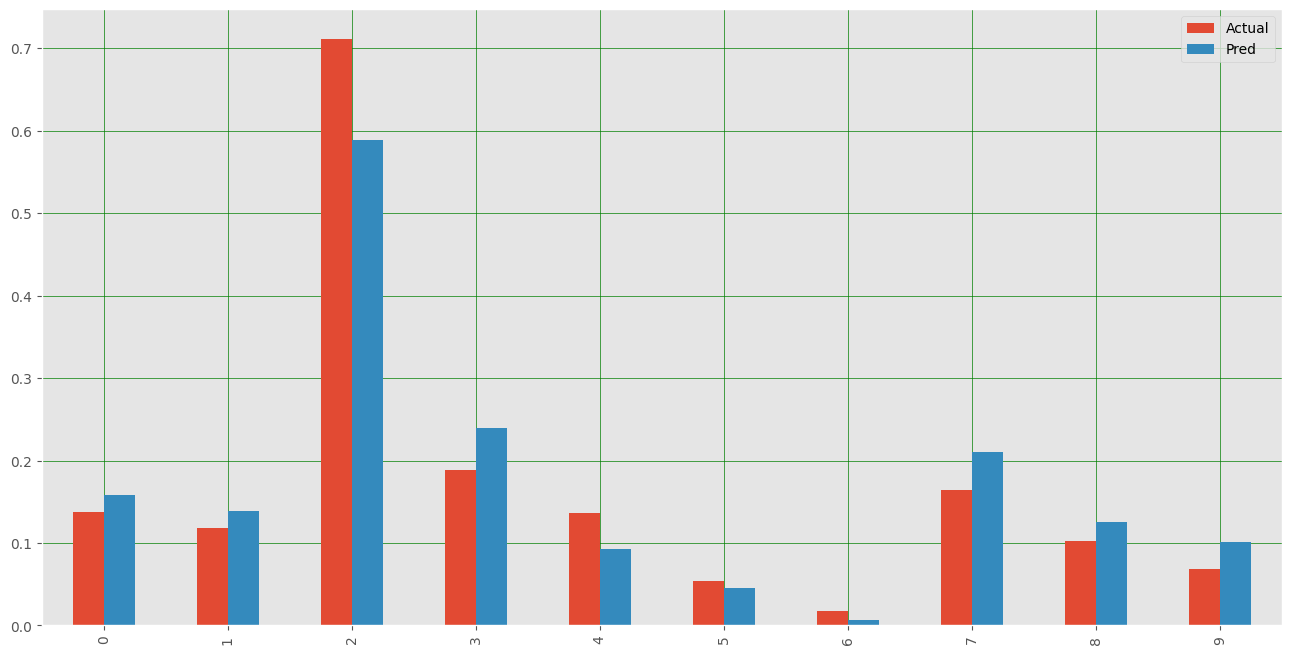

In [ ]:
plot_lm_df = pd.DataFrame({'Actual':y_test,'Pred':predictionsTest})
plot_lm_df.head(10).plot(kind='bar',figsize=(16,8))
plt.grid(which ='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which ='minor', linestyle=':', linewidth='0.5', color='black')